<a href="https://colab.research.google.com/github/alishermutalov/ML-learning/blob/ml/05_ml_07_linerregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning.

### Linear Regression

In [61]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head(10)

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
5,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,1,28,1,4,25500
6,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1,30,2,4,21200
7,"город Ташкент, Яккасарайский район, Саламатина",Яккасарайский,2,32,5,5,20000
8,"город Ташкент, Учтепинский район, Чиланзар-21",Учтепинский,2,51,3,4,26200
9,"город Ташкент, Чиланзарский район, Чиланзар-8",Чиланзарский,1,30,1,4,22200


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

In [62]:
df['district'].value_counts()

,count
district,
Чиланзарский,1641
Мирзо-Улугбекский,1382
Юнусабадский,883
Учтепинский,880
Мирабадский,773
Яккасарайский,658
Яшнободский,484
Шайхантахурский,396
Олмазорский,269


In [63]:
df.dropna()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38,5,5,24500
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49,1,4,32000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64,3,9,40000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18,1,4,11000


**Darsimiz uchun Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz**

In [64]:
housing = df[(df.district=='Чиланзарский') & (df['price']!='Договорная')]
housing.head()

,location,district,rooms,size,level,max_levels,price
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
5,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,1,28,1,4,25500
6,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1,30,2,4,21200


In [65]:
housing['price'] = housing['price'].astype('float64')

<ipython-input-65-b730cf26058f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['price'] = housing['price'].astype('float64')


In [66]:
housing.reset_index(drop=True, inplace=True)

In [67]:
housing = housing[housing['price']<=175000]

In [80]:
housing['size'] = housing['size'].astype('float64')

In [81]:
X = housing['size']
X

,size
0,42.0
1,65.0
2,70.0
3,28.0
4,30.0
...,...
1626,70.0
1627,20.0
1628,32.0
1629,70.0


In [91]:
Y = housing['price']
Y

,price
0,37000.0
1,49500.0
2,55000.0
3,25500.0
4,21200.0
...,...
1626,48000.0
1627,18500.0
1628,28000.0
1629,49800.0


**Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.**

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
print(housing['size'].min())
print(housing['size'].max())

15.0
240.0


In [94]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1630
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    1614 non-null   object 
 1   district    1614 non-null   object 
 2   rooms       1614 non-null   int64  
 3   size        1614 non-null   float64
 4   level       1614 non-null   int64  
 5   max_levels  1614 non-null   int64  
 6   price       1614 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 100.9+ KB


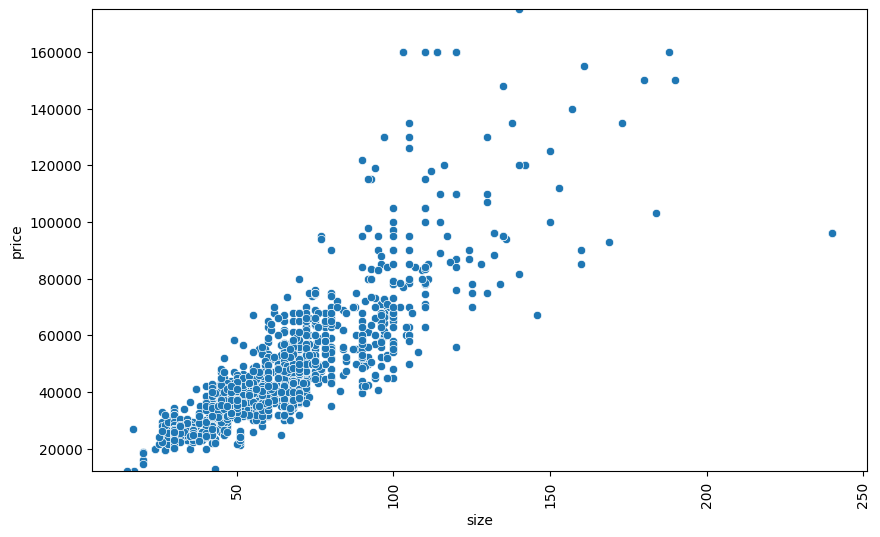

In [95]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y=housing['price'])
plt.ylim(housing['price'].min(), housing['price'].max())
plt.xticks(rotation=90)
plt.show()

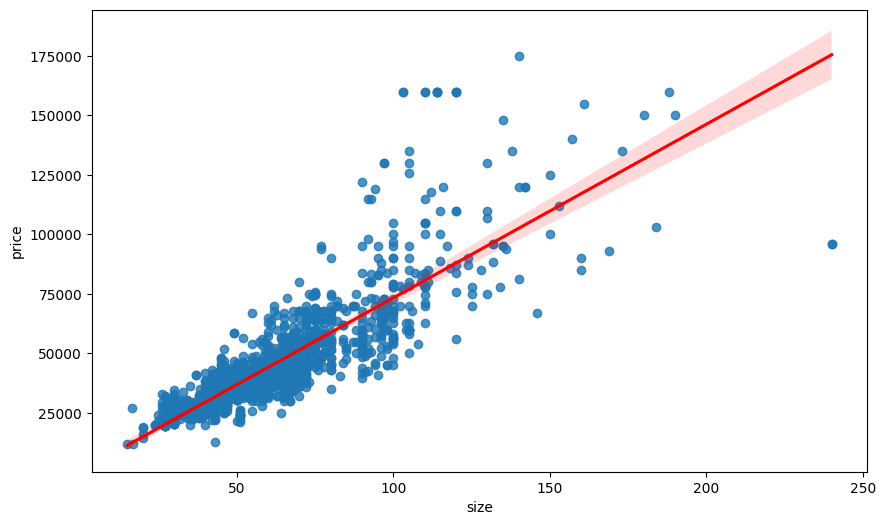

In [96]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

## 1-Vazifa
Sizning vazifangiz yuqoridagi `X` va `y` o'zgaruvchilardan quyidagi formuladan foydalangan xolda $\theta_0$ va $\theta_1$ koeffisientlarni hisoblash.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Bu yerda $\tilde{x}$ - `X` ustun uchun o'rtracha qiymat,  $\tilde{y}$ - `y` ustun uchun o'rtracha qiymat

In [114]:
import numpy as np
o1 = sum((X - X.mean()) * (Y - Y.mean())) / sum((X - X.mean())**2)
o1


729.5781240704738

In [115]:
o0 = Y.mean() - o1*X.mean()

## 2-Vazifa
`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [118]:
x_test = X.sample(5)
print(x_test)
idx = x_test.index


802     77.0
1391    46.0
351     58.0
1294    63.0
778     96.0
Name: size, dtype: float64


In [119]:
y_pred = [o0 + o1*x for x in x_test]
print(y_pred)
y_test = Y[idx]
print(y_test)

[56579.75727960194, 33962.83543341725, 42717.772922262935, 46365.6635426153, 70441.74163694095]
802     48000.0
1391    37000.0
351     32000.0
1294    46500.0
778     58000.0
Name: price, dtype: float64


## 3-Vazifa

Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [120]:
import numpy as np

def calculate_mae(y_true, y_pred):
    """
    Mean Absolute Error (MAE) ni hisoblash funksiyasi.

    Parameters:
        y_true (array-like): Haqiqiy qiymatlar.
        y_pred (array-like): Model bashoratlari.

    Returns:
        float: MAE qiymati.
    """
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

def calculate_rmse(y_true, y_pred):
    """
    Root Mean Squared Error (RMSE) ni hisoblash funksiyasi.

    Parameters:
        y_true (array-like): Haqiqiy qiymatlar.
        y_pred (array-like): Model bashoratlari.

    Returns:
        float: RMSE qiymati.
    """
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return rmse



mae = calculate_mae(y_test, y_pred)
rmse = calculate_rmse(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 6982.154572554655
RMSE: 8396.6926969939
